# Random Forest-based clinical outcome prediction using radiomic features

## NOTE:
- This is an improved version of python code file. Unused funcitons are removed and the whole structure is easier to understand. Actually it has the same result as old version (" open_img_train_rf.ipynb ") created by Dr Cao.

- Before run this program, remember to transform all related ".xlsx" files to ".CSV" files.

## Modify radiomic features and outcome labels:
- The head lists of radiomic features and outcome labels are saved in variable "list_feature_name" and "list_radinfo_name".

- Simply redefine these two lists can change the whole content of corresponding training and testing variables. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
list_feature_name = ['histype','WT1','ER','PR']
len_feature_list = len(list_feature_name)

list_radinfo_name = ['age','mean0','sd0','sd2','sd3','sd4','sd5','sd6','entropy0','entropy2','entropy3','entropy4','entropy5','entropy6','mpp0','mpp2','mpp3','mpp4','mpp5','mpp6']
    #['age','staging','CA125','mean0','sd0','entropy0','mpp0','skewness0','kurtosis0','mean2','sd2','entropy2','mpp2',\
    #                 'skewness2','kurtosis2','mean3','sd3','entropy3','mpp3','skewness3','kurtosis3','mean4','sd4',\
    #                 'entropy4','mpp4','skewness4','kurtosis4','mean5','sd5','entropy5','mpp5','skewness5','kurtosis5',\
    #                 	'mean6','sd6','entropy6','mpp6','skewness6','kurtosis6']#
len_radinfo_list = len(list_radinfo_name)


In [23]:
def list_data(label_fname,list_feature_name, list_radinfo_name):
    csvfile =  open(label_fname)
    reader = csv.DictReader(csvfile)  
    csv_feature = []
    csv_radinfo = []
    len_feature_list = len(list_feature_name)
    len_radinfo_list = len(list_radinfo_name)
    for row in reader:
        csv_feature_row = []
        for i in range(len_feature_list):
            if row[list_feature_name[i]] == '-':
                csv_feature_row.append(int(0))
            elif row[list_feature_name[i]] == '+':
                csv_feature_row.append(int(1))
            else:
                csv_feature_row.append(int(row[list_feature_name[i]]))
        csv_feature.append(csv_feature_row)
        csv_radinfo.append([float(row[list_radinfo_name[i]]) for i in range(len_radinfo_list)])
        
    return np.array(csv_feature), np.array(csv_radinfo)

y_train, x_train = list_data("training_n.CSV", list_feature_name, list_radinfo_name)

y_test, x_test = list_data("testing.CSV", list_feature_name, list_radinfo_name)

In [22]:
# Import random forest model
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

roc_auc = []
fpr = []
tpr = []
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
for i in range( len(list_feature_name)):
    false_pos_rate, true_pos_rate, threshold = metrics.roc_curve(np.array(y_test)[:,i].flatten(), (np.array(predictions)[:,i].flatten()))
    roc_auc.append(metrics.auc(false_pos_rate, true_pos_rate))
    fpr.append(false_pos_rate)
    tpr.append(true_pos_rate)
print(roc_auc)

Mean Absolute Error: 0.35
[0.6196078431372549, 0.7016666666666667, 0.6896103896103896, 0.650354609929078]


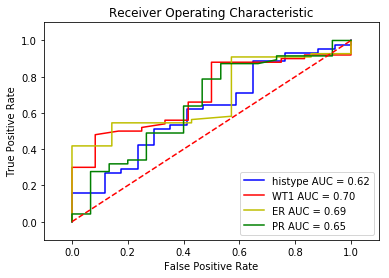

In [26]:
fig = plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr[0], tpr[0], 'b', label=list_feature_name[0] + ' AUC = %0.2f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], 'r', label=list_feature_name[1] +' AUC = %0.2f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], 'y', label=list_feature_name[2] +' AUC = %0.2f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], 'g', label=list_feature_name[3] +' AUC = %0.2f'% roc_auc[3])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


fig.savefig('roc_rf.png', dpi=fig.dpi)